In [1]:
# Version mit vier Punkten und zwei Dimensionen

# 1. Funktionen und Bibliotheken

# Löscht alle Variablen aus der aktuellen Sitzung um sicherzustellen 
# dass keine alten Werte oder Definitionen den Code beeinflussen.
%reset -f

# Importieren der benötigten Bibliotheken
import numpy as np  # Für numerische Berechnungen
import pandas as pd  # Für die Arbeit mit Tabellen Datensätzen
import matplotlib.pyplot as plt # Für graphische Darstellung
from sklearn.model_selection import train_test_split  # Für das Teilen der Daten in Trainings- und Testsets
from sklearn.linear_model import LinearRegression  # Für die lineare Regressionsanalyse
from sklearn.metrics import mean_squared_error  # Für die Berechnung der mittleren quadratischen Abweichung (MSE)

# Definition einer Funktion für die Berechnung von Punkten auf einer kubischen Bézierkurve
def cubic_bezier(points, t):
    # Berechnet einen Punkt auf der Bézierkurve für den gegebenen Parameter t
    return ((1 - t)**3 * points[0] +  # Einfluss des ersten Kontrollpunkts
            3 * (1 - t)**2 * t * points[1] +  # Einfluss des zweiten Kontrollpunkts
            3 * (1 - t) * t**2 * points[2] +  # Einfluss des dritten Kontrollpunkts
            t**3 * points[3])  # Einfluss des vierten Kontrollpunkts

# Funktion zur Generierung von 100 Punkten auf einer Bézierkurve
def generate_bezier_points(points, num_points=100):
    # Generiert num_points Punkte auf der Bézierkurve
    return np.array([cubic_bezier(points, t) for t in np.linspace(0, 1, num_points)])

# Funktion zur Berechnung der Länge einer Kurve
def curve_length(curve):
    # Berechnet die Gesamtlänge einer Kurve basierend auf den Distanzen zwischen aufeinanderfolgenden Punkten
    distances = np.sqrt(np.sum(np.diff(curve, axis=0)**2, axis=1))
    return np.sum(distances)

# Funktion zur Berechnung der Distanz zwischen zwei Punkten
def point_distance(p1, p2):
    p1 = np.array(p1)  # Umwandeln der Punkte in numpy Arrays
    p2 = np.array(p2)
    # Berechnung der euklidischen Distanz
    return np.sqrt(np.sum((p1 - p2)**2))

In [2]:
# 2. Bézierkurven zufallsgenerieren und vermessen
# Dies erzeugt die Daten für späteres Maschinenlernen
# n kann angepasst werden aber bei großem n dauert es lange zu rendern

# Anzahl der Bézierkurven die erzeugt werden sollen
n = 1000 

# Generierung von zufälligen Kontrollpunkten für n Bézierkurven
# Jede Bézierkurve hat 4 Kontrollpunkte im 2D-Raum
punkte_cubic = np.random.randint(low=0, high=30, size=(n, 4, 2))

# Initialisierung einer Liste zum Speichern der Ergebnisse
data = []

# Schleife über jede Gruppe von Kontrollpunkten
for i in range(n):
    control_points = punkte_cubic[i]  # Die Kontrollpunkte der aktuellen Bézierkurve
    bezier_points = generate_bezier_points(control_points)  # Generierung der Bézierkurve
    length = curve_length(bezier_points)  # Berechnung der Länge der Bézierkurve
    
    # Berechnung der Distanzen zwischen den Kontrollpunkten
    d01 = point_distance(control_points[0], control_points[1])  # Distanz zwischen P0 und P1
    d02 = point_distance(control_points[0], control_points[2])  # Distanz zwischen P0 und P2
    d03 = point_distance(control_points[0], control_points[3])  # Distanz zwischen P0 und P3
    d12 = point_distance(control_points[1], control_points[2])  # Distanz zwischen P1 und P2
    d13 = point_distance(control_points[1], control_points[3])  # Distanz zwischen P1 und P3
    d23 = point_distance(control_points[2], control_points[3])  # Distanz zwischen P2 und P3
    
    # Speichern der Ergebnisse als Eintrag in der Tabelle
    entry = {
        'P0': control_points[0].tolist(),  # Koordinaten von P0
        'P1': control_points[1].tolist(),  # Koordinaten von P1
        'P2': control_points[2].tolist(),  # Koordinaten von P2
        'P3': control_points[3].tolist(),  # Koordinaten von P3
        'Length': length,  # Länge der Bézierkurve
        'D_P0_P1': d01,  # Distanz zwischen P0 und P1
        'D_P0_P2': d02,  # Distanz zwischen P0 und P2
        'D_P0_P3': d03,  # Distanz zwischen P0 und P3
        'D_P1_P2': d12,  # Distanz zwischen P1 und P2
        'D_P1_P3': d13,  # Distanz zwischen P1 und P3
        'D_P2_P3': d23,  # Distanz zwischen P2 und P3
    }
    data.append(entry)  # Hinzufügen des Eintrags

# Erstellen eines Pandas DataFrame aus der Ergebnissammlung
df_trainingsdaten = pd.DataFrame(data)

print("Die Kontrollpunkte der Kurven, Länge der Kurven, und Abstände zwischen den Kontrollpunkten:\n")
print(df_trainingsdaten)

Die Kontrollpunkte der Kurven, Länge der Kurven, und Abstände zwischen den Kontrollpunkten:

           P0        P1        P2        P3     Length    D_P0_P1    D_P0_P2  \
0    [29, 25]   [15, 3]   [27, 5]  [23, 13]  25.711563  26.076810  20.099751   
1    [21, 27]  [15, 17]    [1, 5]   [22, 1]  35.820559  11.661904  29.732137   
2    [17, 12]  [25, 29]    [3, 4]  [12, 23]  23.415526  18.788294  16.124515   
3     [21, 6]   [8, 24]  [15, 29]  [11, 12]  29.180474  22.203603  23.769729   
4     [3, 22]    [5, 9]   [0, 24]   [19, 4]  25.625502  13.152946   3.605551   
..        ...       ...       ...       ...        ...        ...        ...   
995  [27, 19]    [6, 1]   [9, 14]   [28, 3]  34.620873  27.658633  18.681542   
996  [10, 28]   [22, 5]  [25, 28]  [19, 15]  23.759325  25.942244  15.000000   
997   [4, 14]   [0, 23]   [2, 20]  [27, 24]  31.005824   9.848858   6.324555   
998   [25, 6]  [28, 28]    [6, 5]   [8, 26]  33.076500  22.203603  19.026298   
999  [12, 28]  [13, 14]   [

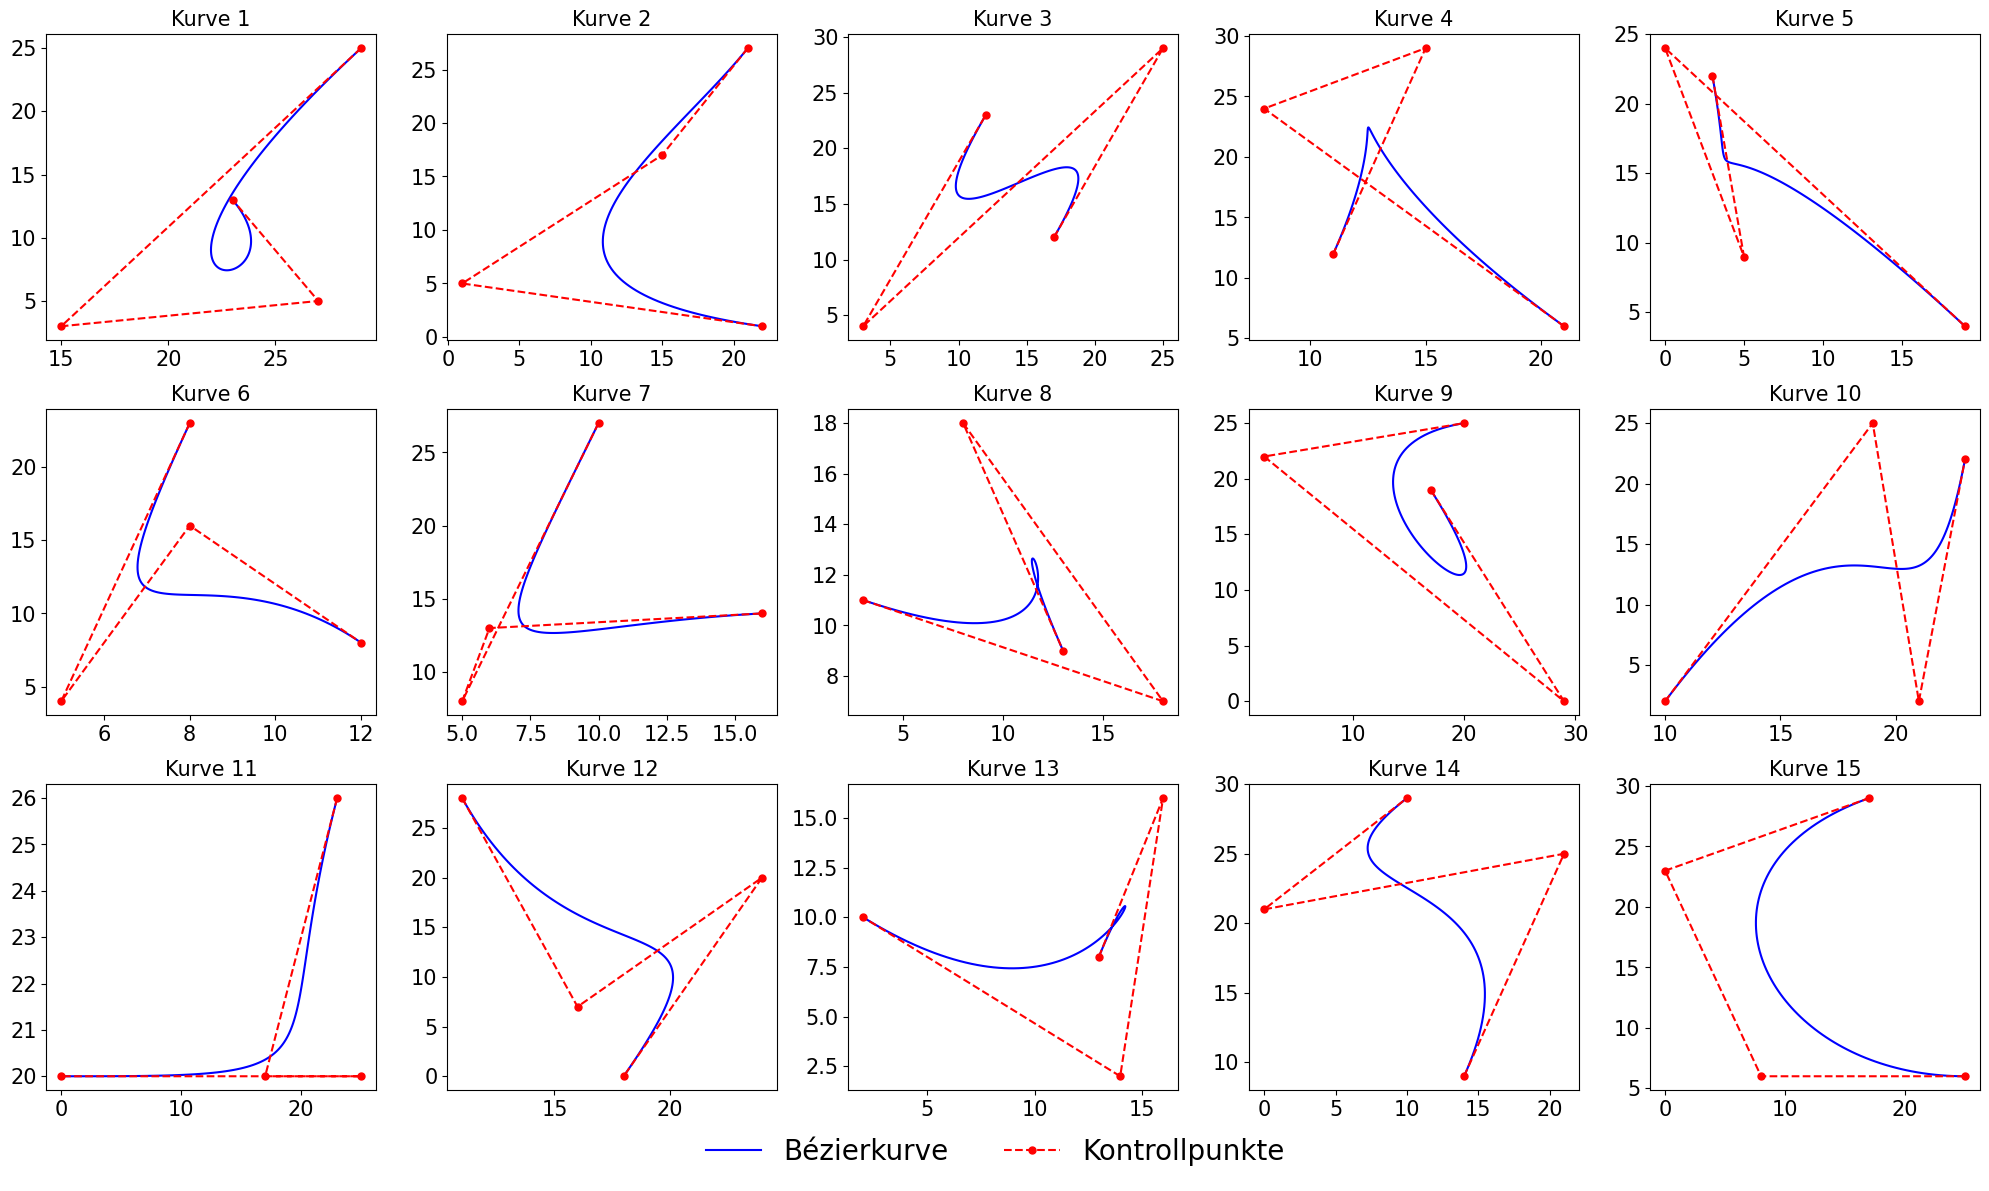

In [5]:
# 3. Plotten der ersten 15 zufallsgenerierten Bézierkurven zur Ansicht

fig, axes = plt.subplots(3, 5, figsize=(20, 12))  # 3x5 Raster für 15 Kurven
axes = axes.flatten()  # Umwandeln der Achsen in Eindimensionalität für einfachere Iteration

# Für die ersten 15 Bézierkurven
for idx, control_points in enumerate(punkte_cubic[:15]):  # Nur die ersten 15 Kontrollpunkt-Sets
    bezier_curve = generate_bezier_points(control_points)  # Punkte auf der Bézierkurve generieren
    
    ax = axes[idx]
    control_points = np.array(control_points)  # Sicherstellen, dass Kontrollpunkte ein NumPy-Array sind
    
    # Plot der Bézierkurve
    ax.plot(bezier_curve[:, 0], bezier_curve[:, 1], color='blue')  # Blaue Bézierkurve
    # Kontrollpunkte plotten
    ax.plot(control_points[:, 0], control_points[:, 1], 'ro--', markersize=5)  # Rote Kontrollpunkte
    ax.set_title(f"Kurve {idx + 1}", fontsize=15)  
    ax.tick_params(axis='both', labelsize=15)  # Schriftgröße für die Achsenticks

# Entfernen überschüssiger Subplots, falls weniger als 15 Kurven vorhanden
for ax in axes[len(punkte_cubic[:15]):]:
    ax.axis('off')

# Globale Legende hinzufügen
fig.legend(
    ['Bézierkurve', 'Kontrollpunkte'], 
    loc='lower center', 
    ncol=2, 
    fontsize=20, 
    frameon=False
)

# Layout anpassen und anzeigen
plt.tight_layout(rect=[0, 0.05, 1, 1])  # Platz für die globale Legende unten schaffen
plt.show()

In [7]:
# 4. Modell fitten und ausgeben 

# Ausgabe von Zusatzinformationen zur besseren Beurteilung
min_length = df_trainingsdaten['Length'].round(5).min()        # Kürzeste Länge
max_length = df_trainingsdaten['Length'].round(5).max()        # Längste Länge
mean_length = df_trainingsdaten['Length'].mean().round(5)      # Durchschnitt
median_length = df_trainingsdaten['Length'].round(5).median()  # Median
print(
    f"Längen der Kurven: [{min_length}, {max_length}]\n"
    f"Mittelwert: {mean_length}\n"
    f"Median: {median_length}\n"
)

# Definition der Merkmale (Features) und des Zielwerts (Target)
# X: Eingabevariablen (Abstände zwischen den Kontrollpunkten)
X = df_trainingsdaten[['D_P0_P1', 'D_P0_P2', 'D_P0_P3', 'D_P1_P2', 'D_P1_P3', 'D_P2_P3']]
# y: Zielvariable (Länge der Bézierkurve)
y = df_trainingsdaten['Length']

# Aufteilen der Daten in Trainings- und Testdatensätze
# 80% der Daten werden für das Training verwendet, 20% für das Testen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Erstellen und Trainieren des Modells
# Initialisierung eines linearen Regressionsmodells
model = LinearRegression()
# Training des Modells mit den Trainingsdaten
model.fit(X_train, y_train)

# Vorhersagen mit dem Modell
# Vorhersage der Zielwerte basierend auf den Testdaten
y_pred = model.predict(X_test)

# Evaluierung des Modells
# Berechnung der mittleren quadratischen Abweichung (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")  # Ausgabe der Abweichung

# Ausgabe der Modellparameter
# Die Koeffizienten der linearen Regression zeigen die Gewichtungen der einzelnen Merkmale
coefficients = model.coef_
intercept = model.intercept_  # Modell-Intercept 
print(f"Intercept: {intercept}\n")  # Ausgabe des Intercept
features = X.columns  # Speichert die Spaltennamen von X in der Variablen features

# Labels für den Index erstellen, gleichen Variablennamen im Paper
labels = ['a', 'b', 'c', 'd', 'e', 'f']

# Erstellen eines DataFrame und setzen der Labels als Index
coef_df = pd.DataFrame({
    'Variable': labels,
    'Gewicht': coefficients.round(5),
    'Feature': features
})

# Ausgabe der Modellkoeffizienten
print("Gewichte der Linearen Regression:")
print(coef_df)

Längen der Kurven: [6.59938, 47.30365]
Mittelwert: 26.23058
Median: 26.261235

Mean Squared Error: 1.3861861038964582
Intercept: 0.20509048890691517

Gewichte der Linearen Regression:
  Variable  Gewicht  Feature
0        a  0.35590  D_P0_P1
1        b  0.38953  D_P0_P2
2        c  0.24021  D_P0_P3
3        d -0.09261  D_P1_P2
4        e  0.39304  D_P1_P3
5        f  0.33816  D_P2_P3


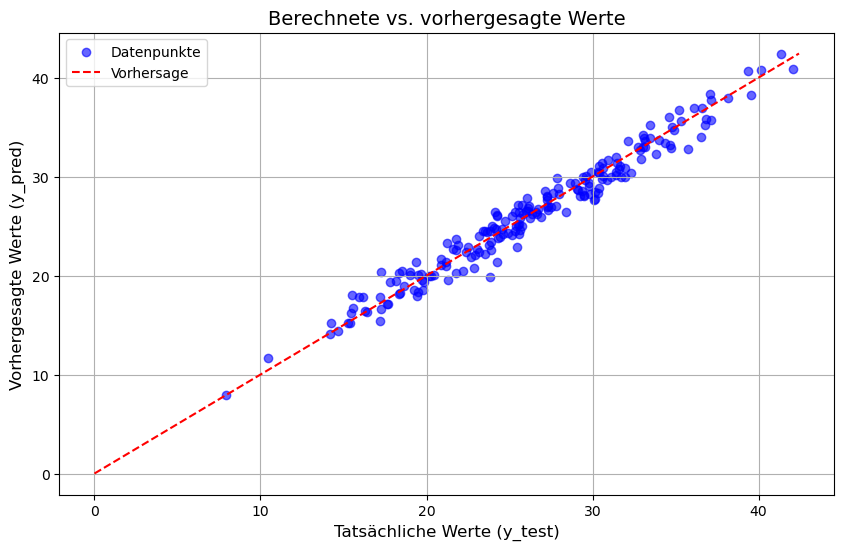

In [9]:
# 5. Plotten der realen Werte vs. der Vorhersage

# Anlage des Diagramms
plt.figure(figsize=(10, 6)) 
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Datenpunkte')  # Streudiagramm

# Hinzufügen der Diagonalen für die Vorhersage
min_value = min(y_test.min(), y_pred.min(), 0)  # Kleinster Wert in den Daten
max_value = max(y_test.max(), y_pred.max())  # Größter Wert in den Daten
plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--', label='Vorhersage')

# Achsenbeschriftungen und Titel
plt.xlabel('Tatsächliche Werte (y_test)', fontsize=12)
plt.ylabel('Vorhergesagte Werte (y_pred)', fontsize=12)
plt.title('Berechnete vs. vorhergesagte Werte', fontsize=14)

# Hinzufügen einer Legende und eines Gitters
plt.legend()
plt.grid(True)

# Plot anzeigen
plt.show()

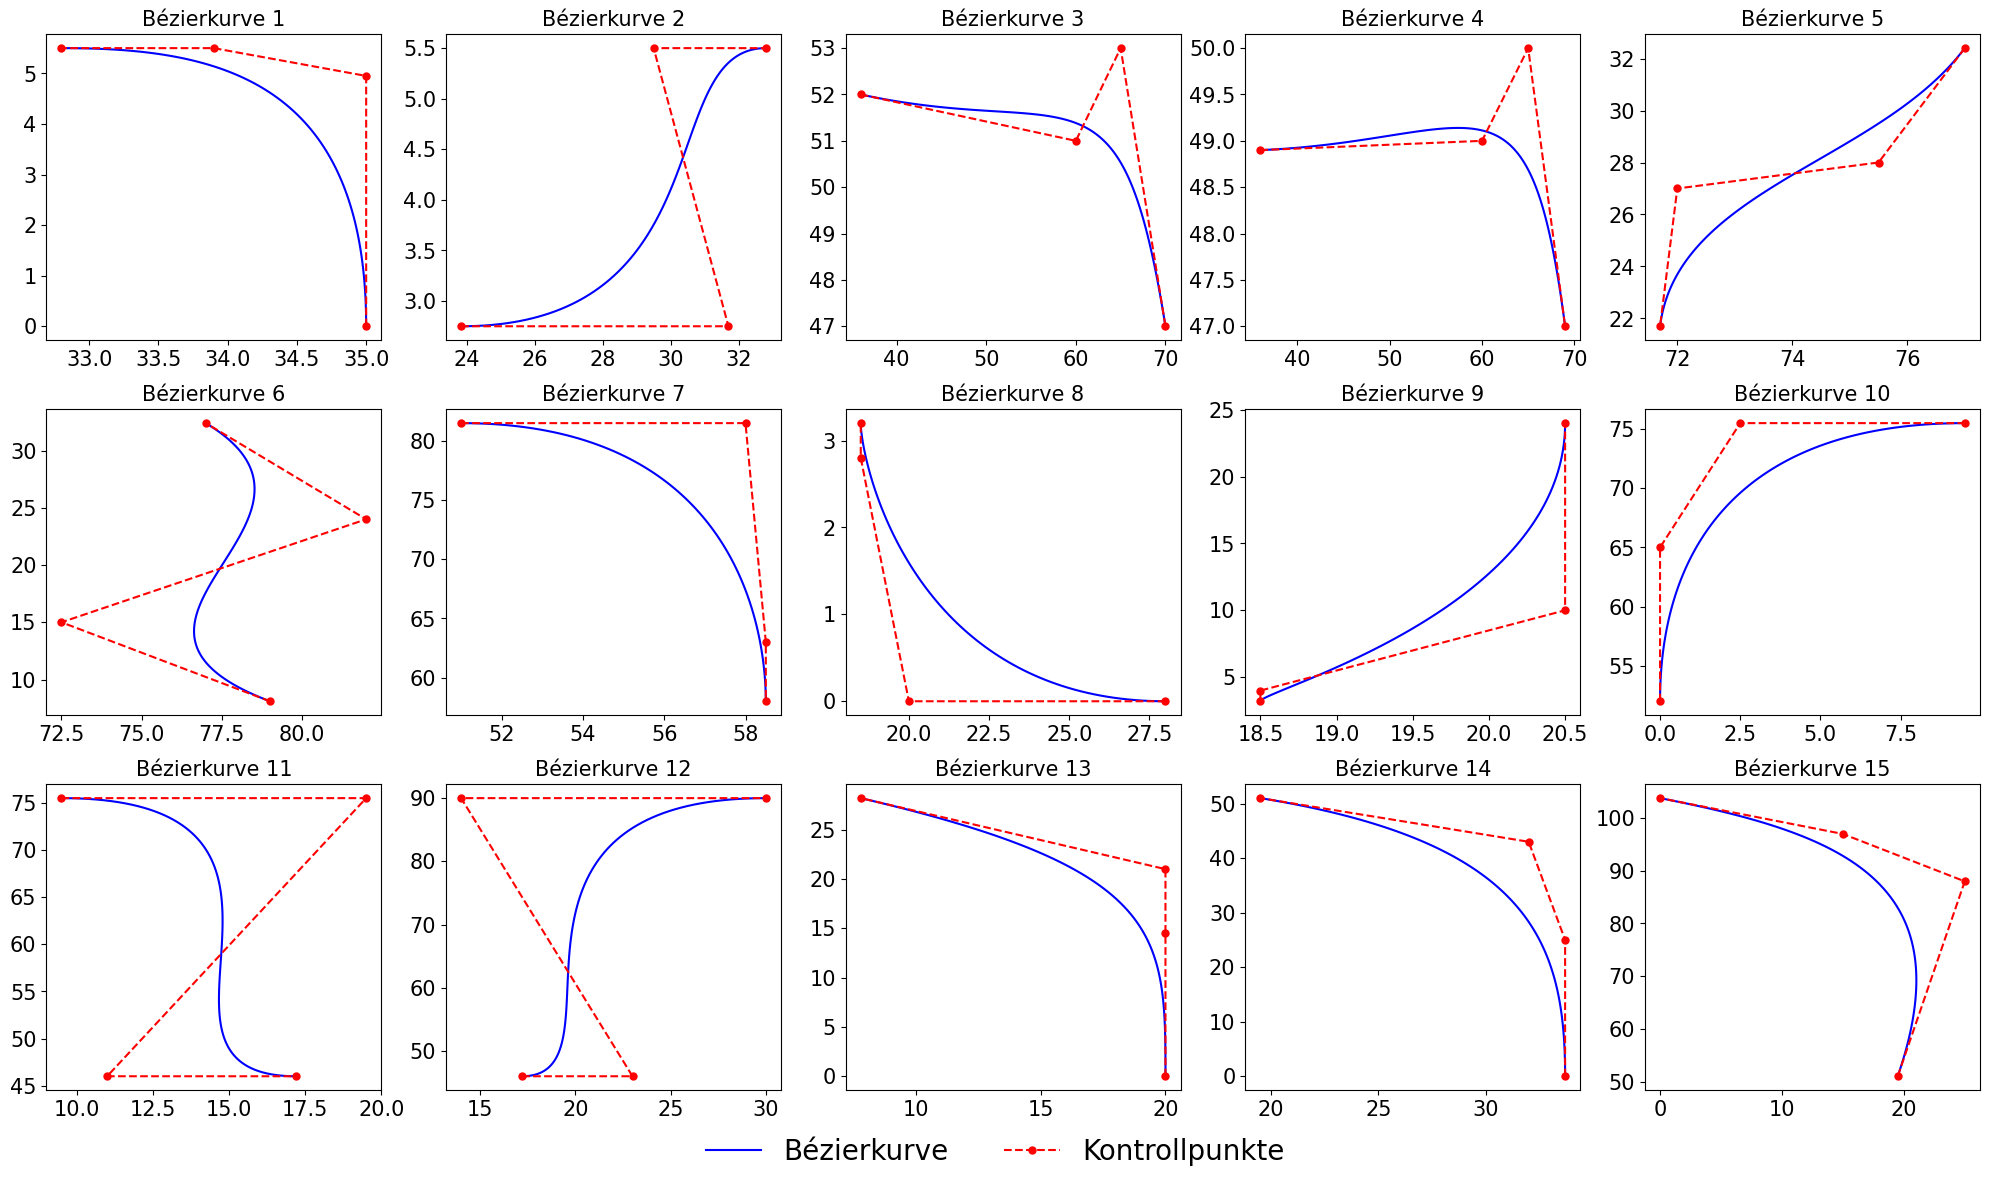

In [11]:
# 6. Einführen und Plotten von Testdaten aus realen Projekten

punkte_testdaten = [     # siehe https://github.com/benjaminwand/cookie-cutters
# corona virus   
[[35, 0], [35, 4.95], [33.9, 5.5], [32.8, 5.5]], 
[[23.835, 2.75], [31.7, 2.75], [29.5, 5.5], [32.8, 5.5]],
# chaosknoten    
[[36.0, 52.0], [60.0, 51.0], [65.0, 53.0], [70.0, 47.0]],
 [[36.0, 48.9], [60.0, 49.0], [65.0, 50.0], [69.0, 47.0]],
 [[77.0, 32.4], [75.5, 28.0], [72.0, 27.0], [71.7, 21.7]],
 [[79.0, 8.1], [72.5, 15.0], [82.0, 24.0], [77.0, 32.4]],
# cactus    
[[51, 81.5], [58, 81.5], [58.5, 63], [58.5, 58]], 
[[28, 0], [20, 0], [18.5, 2.8], [18.5, 3.2]],
[[18.5, 3.2], [18.5, 4], [20.5, 10], [20.5, 24]],
[[0, 52], [0, 65], [2.5, 75.5], [9.5, 75.5]],
[[9.5, 75.5], [19.5, 75.5], [11, 46], [17.2, 46]],
[[17.2, 46], [23, 46], [14, 90], [30, 90]],
# fairydust rocket
[[20, 0], [20, 14.5], [20, 21], [7.8, 28.2]],
[[33.7, 0], [33.7, 25], [32, 43], [19.5, 51]],
[[19.5, 51], [25, 88], [15, 97], [0, 103.8]]
]

# Plotten der Bézierkurven aus den punkte_testdaten
fig, axes = plt.subplots(3, 5, figsize=(20, 12))  # 3x5 Raster für 15 Kurven
axes = axes.flatten()  # Achsen in flache Liste umwandeln

# Plot jeder Bézierkurve
for idx, control_points in enumerate(punkte_testdaten):
    bezier_curve = generate_bezier_points(np.array(control_points))  # Bézierkurve berechnen
    control_points = np.array(control_points)  # Kontrollpunkte in NumPy-Array umwandeln
    
    ax = axes[idx]
    # Bézierkurve plotten
    ax.plot(bezier_curve[:, 0], bezier_curve[:, 1], color="blue")
    # Kontrollpunkte plotten
    ax.plot(control_points[:, 0], control_points[:, 1], 'ro--', markersize=5)
    # Titel für jede Kurve
    ax.set_title(f"Bézierkurve {idx + 1}", fontsize=15)
    ax.tick_params(axis='both', labelsize=15)  # Schriftgröße für die Achsenticks

# Überschüssige Subplots deaktivieren (falls weniger als 15 Kurven)
for ax in axes[len(punkte_testdaten):]:
    ax.axis('off')

# Globale Legende hinzufügen
fig.legend(
    ['Bézierkurve', 'Kontrollpunkte'], 
    loc='lower center', 
    ncol=2, 
    fontsize=20, 
    frameon=False
)

# Layout anpassen und anzeigen
plt.tight_layout(rect=[0, 0.05, 1, 1])  # Platz für die globale Legende unten schaffen
plt.show()

In [13]:
# 7. Berechnung und Ausgabe der Abstände zwischen den Kontrollpunkten für den Testdatensatz

test_daten = []
for control_points in punkte_testdaten:

    # Kontrollpunkte in NumPy-Array konvertieren
    control_points = np.array(control_points)

    bezier_points = generate_bezier_points(control_points)  # Generierung der Bézierkurve
    length = curve_length(bezier_points)  # Berechnung der Länge der Bézierkurve
    
    d01 = point_distance(control_points[0], control_points[1])  # Distanz zwischen P0 und P1
    d02 = point_distance(control_points[0], control_points[2])  # Distanz zwischen P0 und P2
    d03 = point_distance(control_points[0], control_points[3])  # Distanz zwischen P0 und P3
    d12 = point_distance(control_points[1], control_points[2])  # Distanz zwischen P1 und P2
    d13 = point_distance(control_points[1], control_points[3])  # Distanz zwischen P1 und P3
    d23 = point_distance(control_points[2], control_points[3])  # Distanz zwischen P2 und P3
    
    # Speichern der Ergebnisse als Eintrag
    entry = {
        'D_P0_P1': d01,   # Distanz zwischen P0 und P1
        'D_P0_P2': d02,   # Distanz zwischen P0 und P2
        'D_P0_P3': d03,   # Distanz zwischen P0 und P3
        'D_P1_P2': d12,   # Distanz zwischen P1 und P2
        'D_P1_P3': d13,   # Distanz zwischen P1 und P3
        'D_P2_P3': d23,   # Distanz zwischen P2 und P3
        'Length': length, # Länge der Bézierkurve
    }
    test_daten.append(entry)

# Umwandeln der Testdaten in ein DataFrame
df_test = pd.DataFrame(test_daten)

# Berechnung und Hinzufügen der Vorhersagen für jede Zeile im DataFrame df_test
df_test['Predicted_Length'] = (
    df_test[features].dot(coefficients) + intercept
)

# Ausgabe des DataFrame
print("Die Kontrollpunkte der Kurven, Länge der Kurven, und Abstände zwischen den Kontrollpunkten:\n")
print(df_test)

Die Kontrollpunkte der Kurven, Länge der Kurven, und Abstände zwischen den Kontrollpunkten:

      D_P0_P1    D_P0_P2    D_P0_P3    D_P1_P2    D_P1_P3    D_P2_P3  \
0    4.950000   5.608921   5.923681   1.229837   2.267708   1.100000   
1    7.865000   6.297200   9.377298   3.521718   2.961841   3.300000   
2   24.020824  29.017236  34.365681   5.385165  10.770330   7.810250   
3   24.000208  29.020855  33.054652   5.099020   9.219544   5.000000   
4    4.648656   7.359348  11.940687   3.640055   7.357309   5.308484   
5    9.479451  16.180544  24.382166  13.086252  17.972479   9.775480   
6    7.000000  19.962465  24.667793  18.506756  23.505319   5.000000   
7    8.000000   9.904040  10.024470   3.176476   3.534119   0.400000   
8    0.800000   7.088018  20.895933   6.324555  20.099751  14.000000   
9   13.000000  23.632605  25.347584  10.793517  14.159802   7.000000   
10  10.000000  29.538111  30.488358  30.700163  29.589525   6.200000   
11   5.800000  44.116210  45.824011  44.911

In [15]:
# 8. Ausgabe der mittleren quadratischen Abweichung 
# mit einigen Zusatzinformationen zur besseren Beurteilung

# Bestimmen und Ausgabe der kürzesten und längsten Länge
min_length = df_test['Length'].round(4).min()    # Kürzeste Länge
max_length = df_test['Length'].round(4).max()    # Längste Länge
mean_length = df_test['Length'].mean().round(4)  # Durchschnitt
median_length = df_test['Length'].round(4).median()  # Median

print(
    f"Längen der Kurven: [{min_length}, {max_length}]\n"
    f"Mittelwert: {mean_length}\n"
    f"Median: {median_length}\n"
)

# Vergleich der vorhergesagten und tatsächlichen Längen
mse = mean_squared_error(df_test['Length'], df_test['Predicted_Length'])
print(f"Mean Squared Error (MSE): {mse}")

Längen der Kurven: [6.5595, 61.8815]
Mittelwert: 29.3494
Median: 27.6438

Mean Squared Error (MSE): 0.3945398527707946


In [ ]:
# 9. Erstellen des Plots der Vorhersage und Testdaten gegenüberstellt

plt.figure(figsize=(10, 6))
plt.scatter(df_test['Length'], df_test['Predicted_Length'], color='blue', alpha=0.6, label='Berechnete Werte')

# Hinzufügen der Diagonalen für perfekte Vorhersage
max_value = max(df_test['Length'].max(), df_test['Predicted_Length'].max())
min_value = min(df_test['Length'].min(), df_test['Predicted_Length'].min(), 0)
plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--', label='Vorhersage')

# Achsenbeschriftungen und Titel
plt.xlabel('Tatsächliche Länge (Length)', fontsize=12)
plt.ylabel('Vorhergesagte Länge (Predicted Length)', fontsize=12)
plt.title('Vergleich: Tatsächliche vs. vorhergesagte Länge', fontsize=14)
plt.legend()
plt.grid(True)

# Plot anzeigen
plt.show()